<h1>The graph Laplacian</h1>

For any graph, one can define a matrix, the combinatorial Laplacian (Laplacian for short), 
The Laplacian matrix can be written as 
$$L = D - W$$
where $D$ is the $n \times n$ diagonal degree matrix and $W$ is the adjacency matrix.
It can be seen that
$$(L x)_i = \sum_{j=1}^n W_{i,j} (x_i - x_j)$$.

In [2]:
import numpy as np

In [3]:
def create_weight(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    return W

In [4]:
def create_Lap(W):
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

In [5]:
n = 100
edgelist = [[i,i+1] for i in range(n-1)] #chain graph
W = create_weight(edgelist,n)
L = create_Lap(W)

In [6]:
x = np.ones(n)

In [7]:
np.dot(L,x)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

<h2>Proposition 1</h2>
Suppose that $\{C_k\}_{k=1}^K$ are maximal connected sets of vertices of $G$ (the addition of any vertex to $C_k$ would be disconnected).  Then the null space of $L$, that is all vectors $x \in \mathbf{R}^n$ such that $Lx = 0$, is the span of the vectors 
$$\mathbf{1}_{C_k}, \quad k=1,\ldots,K$$
where $\mathbf{1}_A$ is 1 for the vertices in $A$ and 0 otherwise.

<h4>Lemma 1</h4>
For an unweighted, undirected graph $G$ that has only 1 connected component, the null space of its Lapacian $L$ is the span of the vector $\mathbf{1}$.

<h5>Proof</h5>
Suppose a graph $G$ has only 1 connected component.  It is immediately evident for $q \in \mathbf{R}$ that $span(\mathbf{1}) = (q\mathbf{1}) \subseteq null(L)$, since $$(L (q\mathbf{1}))_i = \sum_{j=1}^n W_{i,j} ((q\mathbf{1})_i - (q\mathbf{1})_j) = \sum_{j=1}^n W_{i,j} (q - q) = 0, \quad i = 1,\ldots,n.$$
Now suppose that there exists a vector $x \in null(L)$ such that $x$ can not be expressed in the form $q\mathbf{1}$ where $q \in \mathbf{R}$.  Then, $x_i \ne x_j$ for at least one $i \ne j$ and $$(L x)_i = \sum_{j=1}^n W_{i,j} (x_i - x_j) = 0, \quad i = 1,\ldots,n.$$  This implies that the quadratic form $$x^TLx = \sum_{i,j : i > j}W_{i,j}(x_i - x_j)^2 = \sum_{i,j \in E}(x_i - x_j)^2 = 0,$$ which can only occur when $x_i = x_j, \forall i,j$. This contradicts the supposition that $x_i \ne x_j$ for at least one $i \ne j$. Therefore, if $x \in null(L)$ then $x_i = x_j, \forall i,j \Longleftrightarrow x \in span(\mathbf{1})$.  Thus, $null(L) \subseteq span(\mathbf{1})$.
Since $null(L) \subseteq span(\mathbf{1})$ and $span(\mathbf{1}) \subseteq null(L)$, it follows that $null(L) = span(\mathbf{1})$. $\Box$

<h3>Proof</h3>
Let $L_i$ be the the Lapacian of the graph defined by the vertices from $C_i$, where $i = 1, \ldots, K$. Then, by reording the points, the Lapacian $L^K$ can be written as the block diagonal matrix below

$$
L^K =
\begin{bmatrix}
    L_{1} & 0 & \dots  & 0 \\
    0 & L_{2} & \dots  & 0 \\
    \vdots  & \vdots & \ddots & \vdots \\
    0 & 0 & \dots  & L_{K}
\end{bmatrix}
$$

Consider the Lapacian $L^1$ of a graph for which there is only one connected component ($K = 1$).  From **Lemma 1**, it follows that $null(L^1) = span(\mathbf{1}_{C_1})$. 

Suppose that the null space of the Lapacian $L^p$ for a graph $G$ with $p$ connected components is the span of the vectors $\mathbf{1}_{C_k}, k=1,\ldots,p$. Then if we write L^p in the form 
$$
L^p =
\begin{bmatrix}
    L_{1} & 0 & \dots  & 0 \\
    0 & L_{2} & \dots  & 0 \\
    \vdots  & \vdots & \ddots & \vdots \\
    0 & 0 & \dots  & L_{p}
\end{bmatrix}
$$
then the null space is the span of the vectors
$$
\begin{bmatrix}
    \mathbf{1}_{C_1} \\
    0 \\
    \vdots  \\
    0 
\end{bmatrix},
\begin{bmatrix}
    0 \\
    \mathbf{1}_{C_2} \\
    \vdots  \\
    0 
\end{bmatrix},
\begin{bmatrix}
    0 \\
    0 \\
    \vdots  \\
    \mathbf{1}_{C_p} 
\end{bmatrix},
$$
where $\mathbf{1}_{C_k}$ has the same number of rows as $L_k$ (by construction).
Consider the Lapacian $L^{p+1}$ of a graph with one extra connected component. This can be written in the form
$$
L^{p+1} =
\begin{bmatrix}
    L^{p} & 0 \\
    0 & L_{p+1}
\end{bmatrix} = 
\begin{bmatrix}
    L_{1} & 0 & \dots & 0 & 0 \\
    0 & L_{2} & \dots & 0 & 0 \\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & \dots & L_{p}  & 0 \\
    0 & 0 & \dots & 0 & L_{p+1}
\end{bmatrix}
$$
From **Lemma 1**, we know that the null space of $L_{p+1}$ is the span of $\mathbf{1}_{C_{p+1}}$. Because the columns and rows from $L_{p+1}$ are linearly independent from the rows and columns of $L^p$, it follows that the null space of $L^{p+1}$ is the span of the vectors
$$
\begin{bmatrix}
    \mathbf{1}_{C_1} \\
    0 \\
    \vdots  \\
    0 \\
    0
\end{bmatrix},
\begin{bmatrix}
    0 \\
    \mathbf{1}_{C_2} \\
    \vdots  \\
    0 \\
    0
\end{bmatrix},
\begin{bmatrix}
    0 \\
    0 \\
    \vdots  \\
    \mathbf{1}_{C_p} \\
    0
\end{bmatrix},
\begin{bmatrix}
    0 \\
    0 \\
    \vdots  \\
    0 \\
    \mathbf{1}_{C_{p+1}}
\end{bmatrix}.
$$
Therefore, by the Principle of Mathmatical Induciton, **Proposition 1** is true. $\Box$

In [14]:
np.linalg.matrix_rank(L)

99

In [15]:
del edgelist[50]

In [17]:
L = create_Lap(create_weight(edgelist,n))

In [19]:
n - np.linalg.matrix_rank(L)

2

In [20]:
edgelist[49]

[49, 50]

In [21]:
edgelist[50]

[51, 52]

In [22]:
basis1 = np.zeros(n)
basis1[0:51] = 1

In [23]:
L.dot(basis1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
basis2 = np.zeros(n)
basis2[51:] = 1

In [25]:
L.dot(basis2)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

For the connected chain graph, compute the eigenvalues and eigenvectors, and plot (a) the eigenvalues in increasing order (b) plot each eigenvector.

In [27]:
# use np.linalg.eig, it returns both the eigenvalues and eigenvectors

e_vals, e_vecs = np.linalg.eig(L)


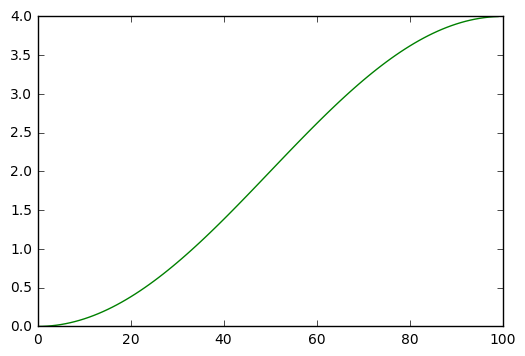

In [31]:
# plot (a) the eigenvalues in increasing order

# Sort the eigenvalues
# sort() sort the eigenvalue from the smallest to largest
eig_vals_sorted = np.sort(e_vals)

# argsort() returns the permutation of indices needed to sort an array
eig_vecs_sorted = e_vecs[:, e_vals.argsort()]

from matplotlib import pyplot as plt
plt.plot(eig_vals_sorted)
plt.show()


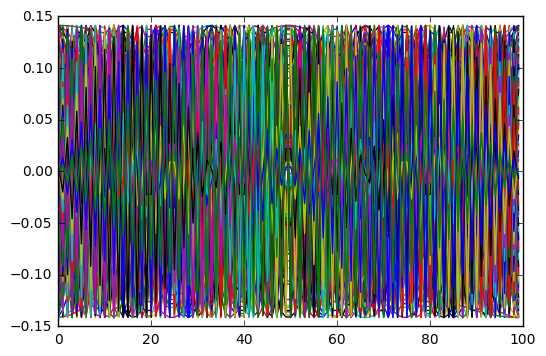

In [33]:
# (b) plot each eigenvector

plt.plot(eig_vecs_sorted)
plt.show()

In [28]:
from matplotlib import pyplot as plt

In [29]:
plt.plot(np.arange(n)**2)

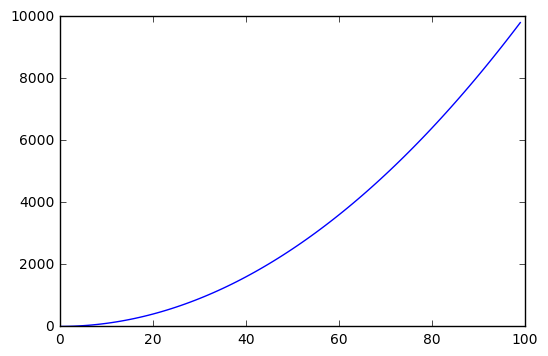

In [30]:
plt.show()